# Online Customer Intention Prediction Model

We are going to build a Predictive Model using customer visits data over a website.



### Dataset Information:

The dataset consists of data points belongs to 12,330 sessions of customer visits to the website,it was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

### Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.
1. Target Variable ‘Revenue’: False and True.

2. “Administrative”, “Administrative Duration”: Represent the Administrative pages visited by the visitor in that session and total time spent in each of this page category.

3. “Informational”, “Informational Duration”: Represent the Information related pages visited by the visitor in that session and total time spent in each of this page category.

3. “Product Related” and “Product Related Duration”: Represent the Product Related pages visited by the visitor in that session and total time spent in each of this page category.

4. “Bounce Rate” refers to the percentage of visitors who enter the site from that page and then leave without triggering any other requests to the analytics server during that session.

5. “Exit Rate” depicts the percentage of exits on a page.

6. “Page Value” feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

7. “Special Day” feature indicates the closeness of the site visiting time to a specific special day.

8. The dataset also includes some other features such as operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

### Objective:
To build a predictive model, which shall decide whether the customer will buy or not, means the variable: Revenue shall be the Response Variable and others are the Predictor Variables.


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## %matplotlib inline

# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Upload the required dataset
df2=pd.read_csv("online_shoppers_intention.csv")

In [5]:
# Get the size of the dataset
df2.shape

(12330, 18)

In [6]:
# Get  the first 10 records from the datase
df2.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [7]:
# Get the descriptive statistics of the dataset
df2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
#Counting the missing values
df2.isna().sum()



Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
df2['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

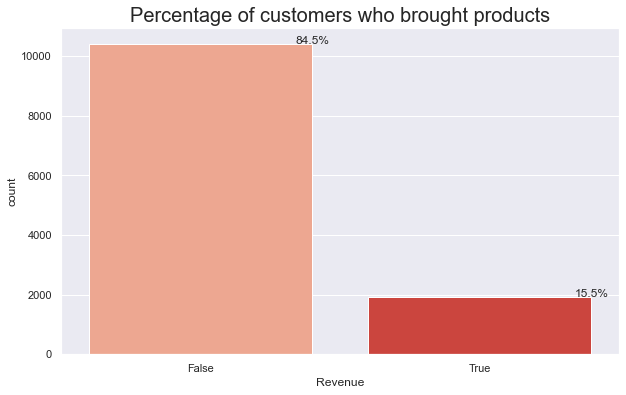

In [10]:
# Plotting the Percentage of customers have brought Revenue. ‘True’ means customer has bought the product and ‘False’ means customer did not buy the product

sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
total = float(len(df2))
ax = sns.countplot(x="Revenue", data=df2,palette="Reds")
plt.title('Percentage of customers who brought products', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

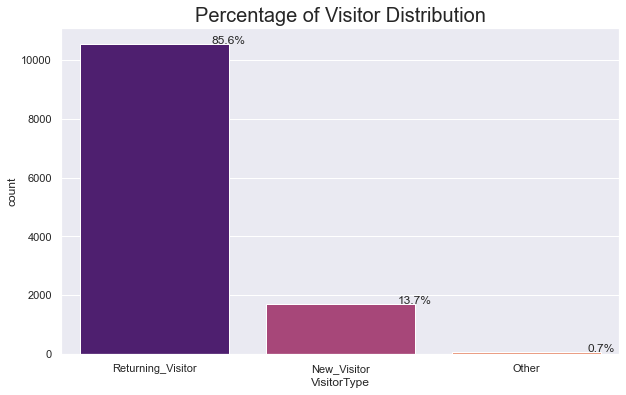

In [11]:
# Distribution of VisitorType
df2['VisitorType'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
total = float(len(df2))
ax = sns.countplot(x="VisitorType", data=df2,palette="magma")
plt.title('Percentage of Visitor Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

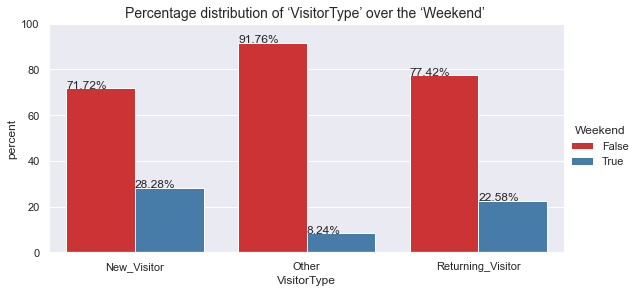

In [12]:
# Percentage Distribution of VistorType over the Weekend

x,y = 'VisitorType', 'Weekend'
df1 = df2.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette="Set1",height=4, aspect=2)
g.ax.set_ylim(0,100)
plt.title('Percentage distribution of ‘VisitorType’ over the ‘Weekend’ ', fontsize=14)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


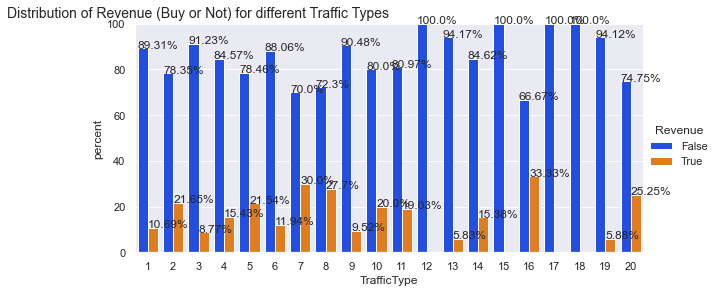

In [13]:
# Distribution of Revenue (Buy or Not) for different Traffic Types

x,y = 'TrafficType', 'Revenue'
df1 = df2.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette="bright",height=4, aspect=2)
g.ax.set_ylim(0,100)
plt.title('Distribution of Revenue (Buy or Not) for different Traffic Types', fontsize=14,ha="right")
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    

Text(0, 0.5, 'Count')

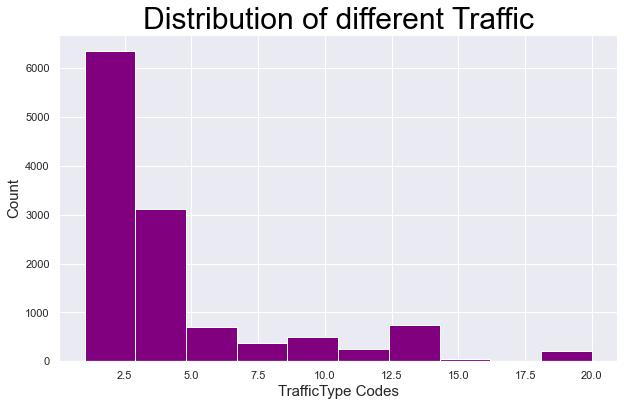

In [14]:
# Distribution of Customers based on Different Traffic Type Codes
plt.figure(figsize=(10,6))
plt.hist(df2['TrafficType'],color="purple")
plt.title('Distribution of different Traffic',fontsize = 30,color="black")
plt.xlabel('TrafficType Codes', fontsize = 15, )
plt.ylabel('Count', fontsize = 15)

Text(0, 0.5, 'Count')

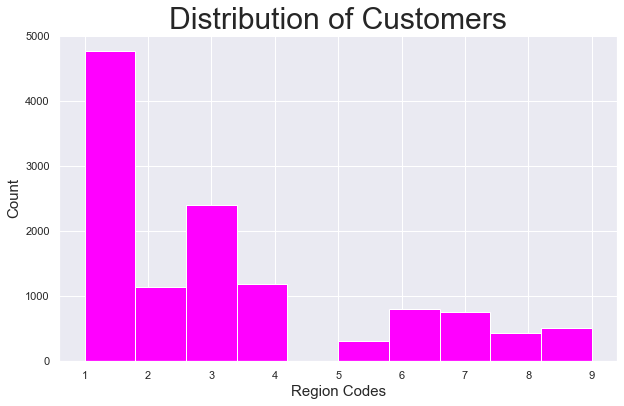

In [15]:
#Distribution of Customers based on Region Codes
plt.figure(figsize=(10,6))
plt.hist(df2['Region'],color="magenta")
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0, 0.5, 'Count')

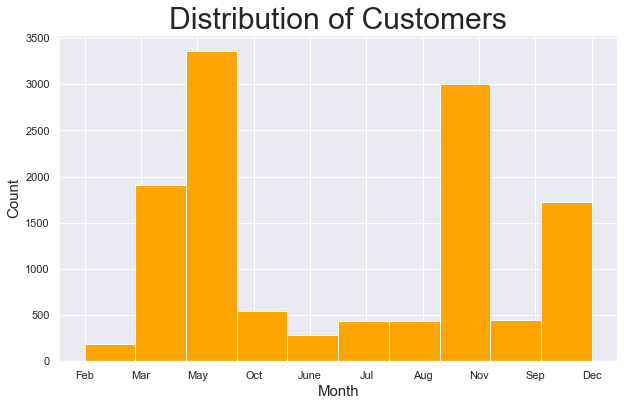

In [16]:
#  Distribution of Customers over Months

plt.figure(figsize=(10,6))
plt.hist(df2['Month'],color="orange")
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

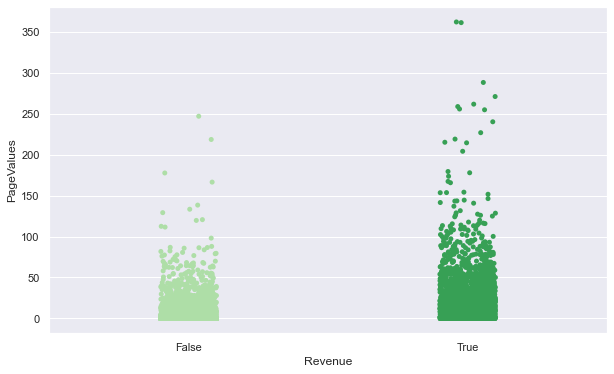

In [17]:
# Distribution of Pagevalues over Revenue. seaborn.stripplot draws a scatterplot where one variable is categorical.
plt.figure(figsize=(10,6))
sns.stripplot(df2['Revenue'], df2['PageValues'],palette="Greens")

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

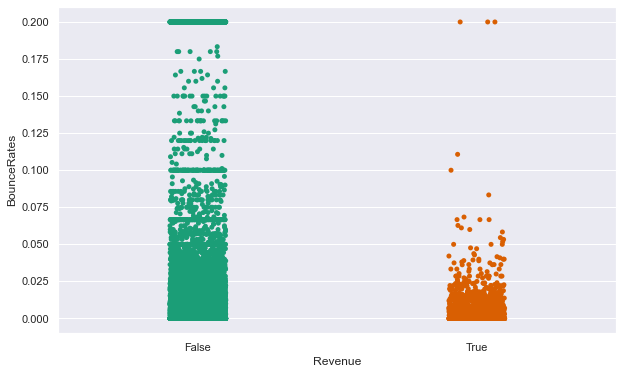

In [18]:
# Distribution of Revenue over BounceRates
plt.figure(figsize=(10,6))
sns.stripplot(df2['Revenue'], df2['BounceRates'],palette="Dark2")


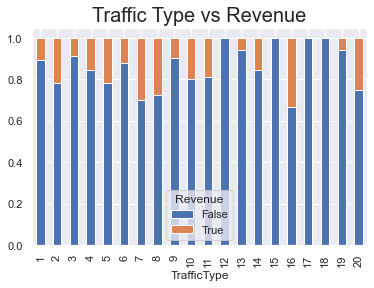

In [19]:
# Distribution of TrafficType over Revenue
df = pd.crosstab(df2['TrafficType'], df2['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Traffic Type vs Revenue', fontsize = 20)
plt.show()


Text(0.5, 1.0, 'Distribution of Region over Revenue')

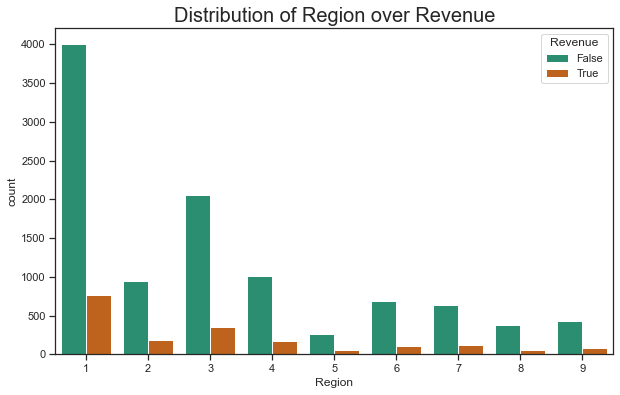

In [20]:
#Distribution of Region over Revenue

sns.set(style="ticks")
plt.figure(figsize=(10,6))
ax4=sns.countplot(df2['Region'],hue='Revenue', data=df2,palette="Dark2")
plt.title('Distribution of Region over Revenue', fontsize = 20)



Text(0.5, 1.0, 'Mon. vs PageValues w.r.t. Rev.')

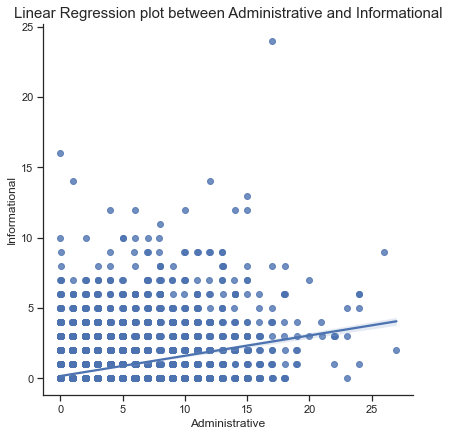

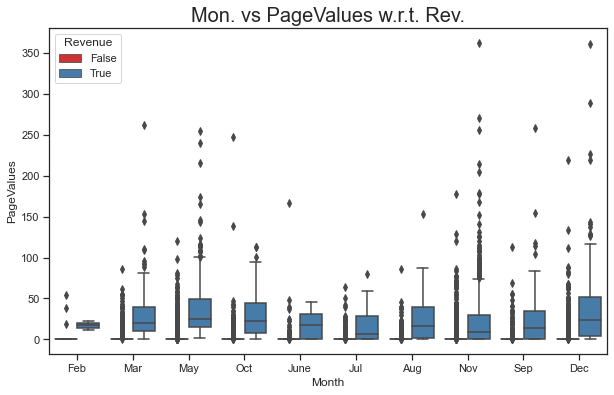

In [21]:
# 

sns.lmplot(x = 'Administrative', y = 'Informational', data = df2,palette="rainbow", x_jitter = 0.05, height=6, aspect=1)
plt.title('Linear Regression plot between Administrative and Informational', fontsize = 15)

# Multi-variate analysis
# Month vs Pagevalues wrt Revenue
plt.figure(figsize=(10,6))
sns.boxplot(x = df2['Month'], y = df2['PageValues'], hue = df2['Revenue'], palette = 'Set1')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 20)

Text(0.5, 1.0, 'Mon. vs BounceRates w.r.t. Rev.')

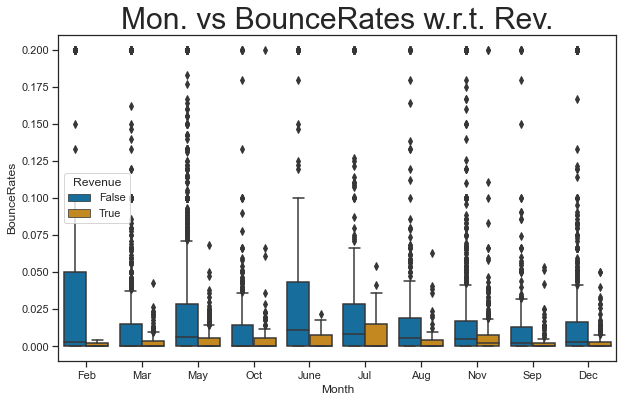

In [22]:
# month vs bouncerates wrt revenue
plt.figure(figsize=(10,6))
sns.boxplot(x = df2['Month'], y = df2['BounceRates'], hue = df2['Revenue'], palette = 'colorblind')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

Text(0.5, 1.0, 'Visitors vs BounceRates w.r.t. Rev.')

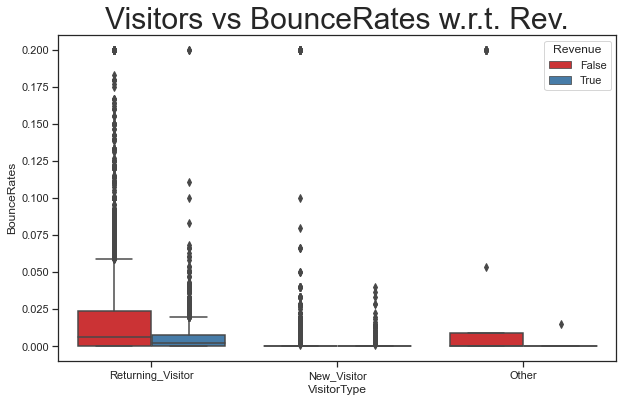

In [23]:
#  Visitor type vs exit rates w.r.t revenue
plt.figure(figsize=(10,6))
sns.boxplot(x = df2['VisitorType'], y = df2['BounceRates'], hue = df2['Revenue'], palette = 'Set1')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

Text(0.5, 1.0, 'Month vs ExitRates w.r.t. Rev.')

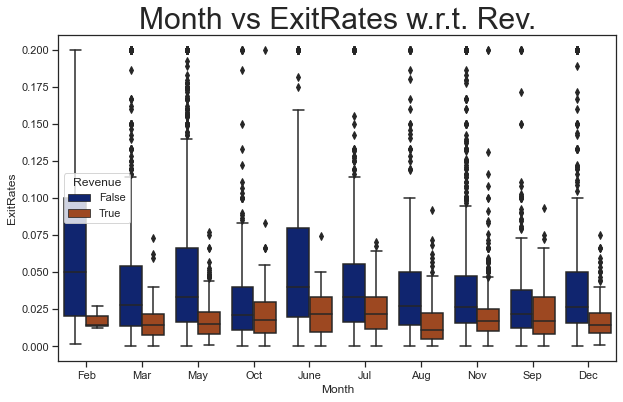

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df2['Month'], y = df2['ExitRates'], hue = df2['Revenue'], palette = 'dark')
plt.title('Month vs ExitRates w.r.t. Rev.', fontsize = 30)

In [25]:
df2.fillna(0, inplace = True)
# checking the no. of null values in data after imputing the missing value
df2.isnull().sum().sum()

0

## Cluster Analysis

The goal of cluster analysis in marketing is to accurately segment customers in order to achieve more effective customer marketing via personalization. A common cluster analysis method is a mathematical algorithm known as k-means cluster analysis, sometimes referred to as scientific segmentation.

Cluster of customers Administrative Duration vs Bounce Rate. We have considered columns 1 as Administrative Duration and column 6 as Bounce Rate. Total we have built 11 clusters.

WCSS: One measurement is Within Cluster Sum of Squares (WCSS), which measures the squared average distance of all the points within a cluster to the cluster centroid. To calculate WCSS, you first find the Euclidean distance (see figure below) between a given point and the centroid to which it is assigned.

Here, Elbow method is a graph between WCSS and No.of Clusters.

In [26]:
# preparing the dataset
x = df2.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape



(12330, 2)

In [27]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
    init = 'k-means++',
    max_iter = 300,
    n_init = 10,
    random_state = 0,
    algorithm = 'elkan',
    tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
   
   

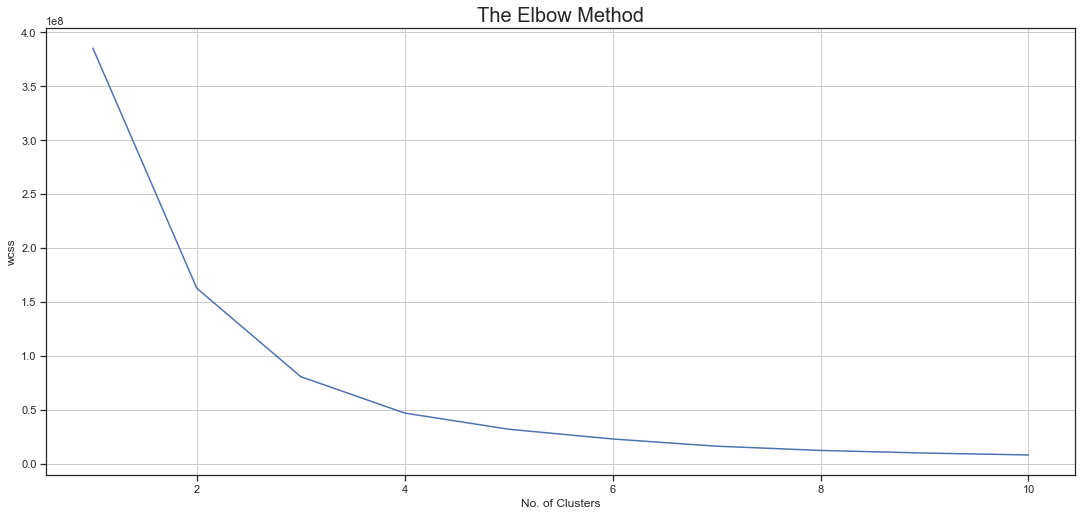

In [28]:
# Plotting the Elbow graph to determine the number of k -> Clusters
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


> The maximum bend is at (3) third index, that is the number of Optimal no. of Clusters for Adminstrative Duration and Revenue is Three. plotting the clusters.

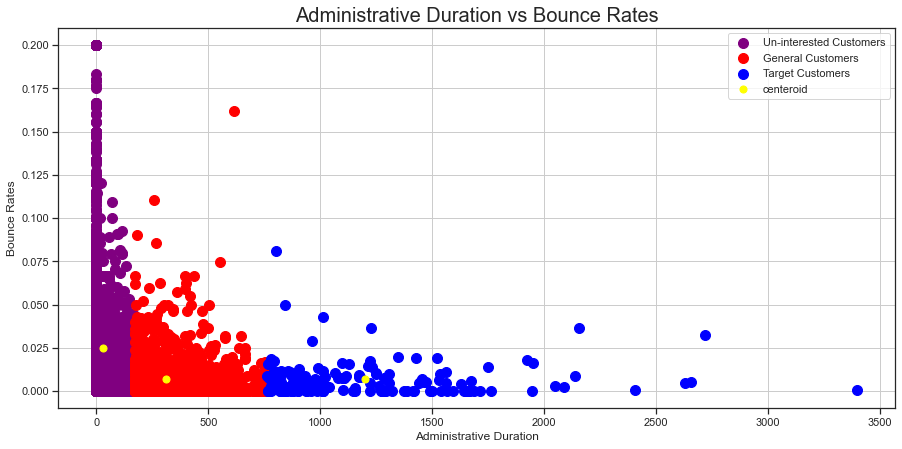

In [29]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'purple', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'blue', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'yellow' , label = 'centeroid')
plt.title('Administrative Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

> We have considered columns 3 as Informational Duration and column 6 as Bounce Rate.

In [30]:
# informational duration vs Bounce Rates
x = df2.iloc[:, [3, 6]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
    init = 'k-means++',
    max_iter = 300,
    n_init = 10,
    random_state = 0,
    algorithm = 'elkan',
    tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    

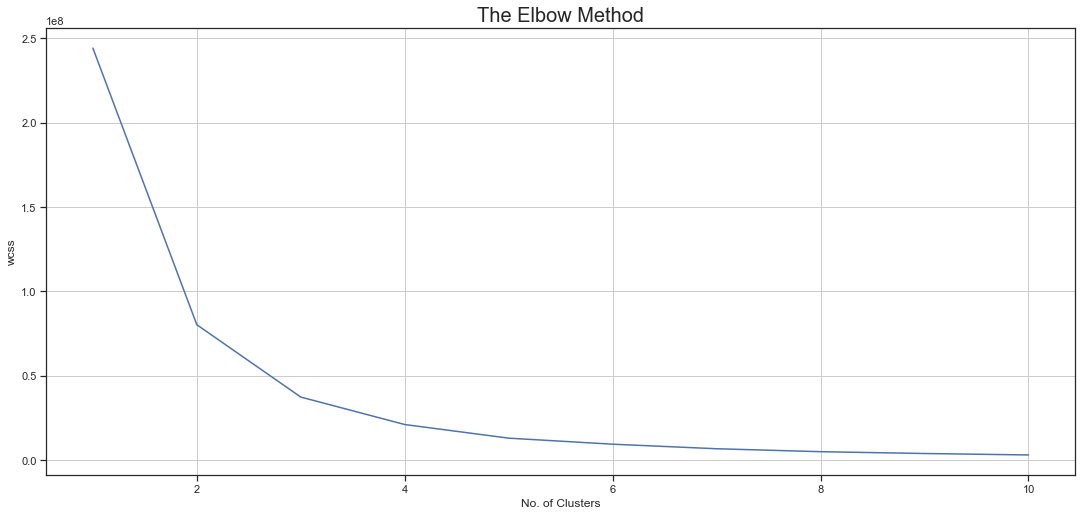

In [31]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

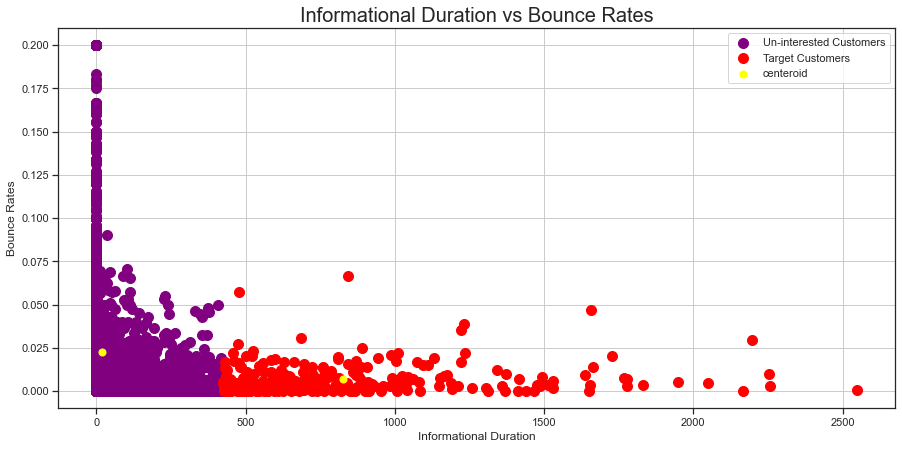

In [32]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'purple', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'yellow' , label = 'centeroid')
plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [33]:
# From where customer comes: Region vs Traffic Type
x = df2.iloc[:, [13, 14]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
    init = 'k-means++',
    max_iter = 300,
    n_init = 10,
    random_state = 0,
    algorithm = 'elkan',
    tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

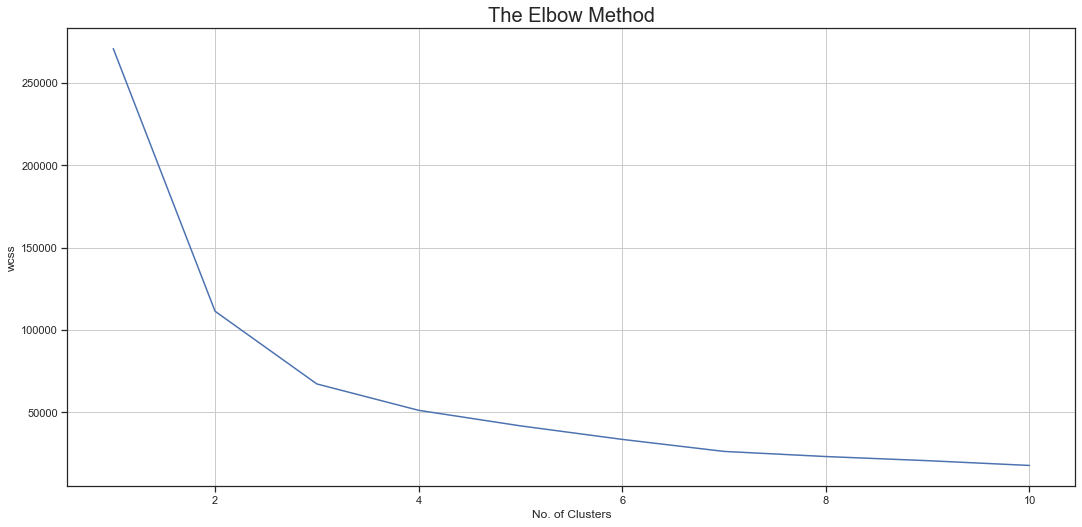

In [34]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

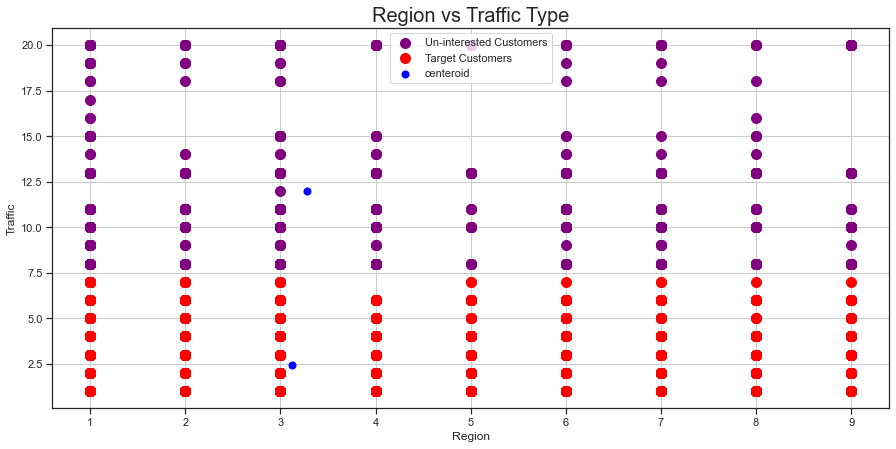

In [35]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'purple', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Region vs Traffic Type', fontsize = 20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.show()

### Correlation of independent features vs revenue
> We have to examine which features are correlated with the target variable.
> The strongest predictor of conversion was pageValues column.
> Although individual correlations are low but collectively these values are enough to give our model a decent steer and have a positive impact upon perfomance.

In [36]:
# Correlation Matrix
df2.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


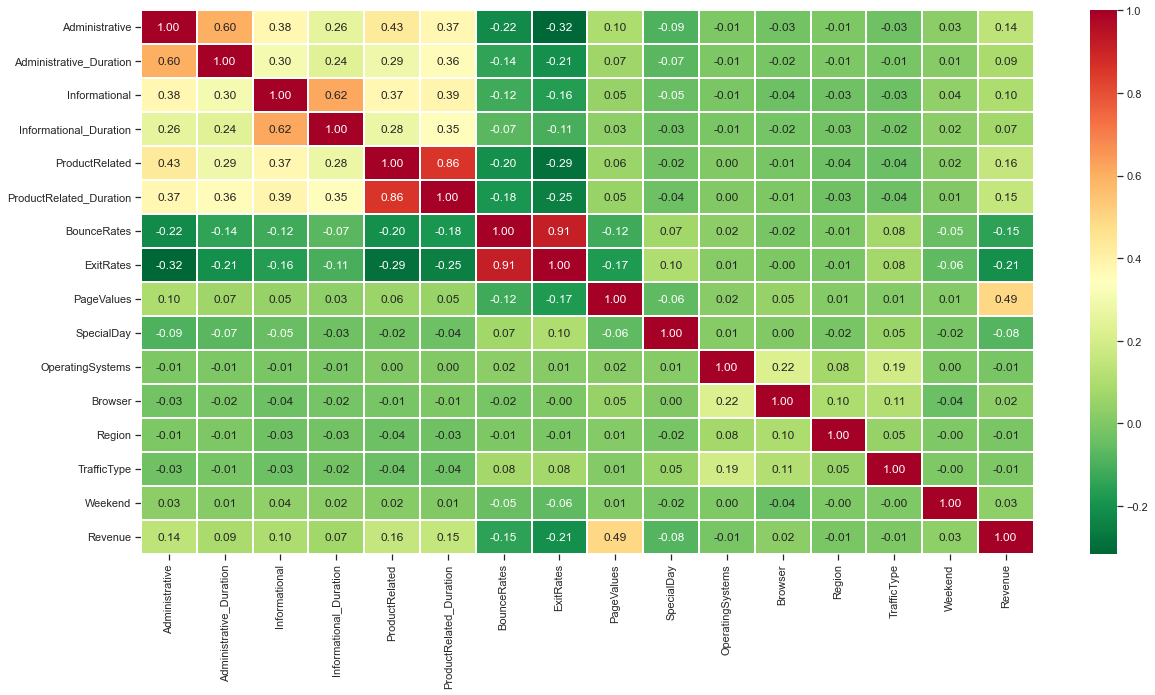

In [37]:
# plot the correlation matrix using seaborn
corr_matrix =df2.corr()
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.3,
              fmt=".2f",
              cmap="RdYlGn_r" );

## Data Preprocessing
>Data Preprocessing to build Random Forest classifier ,KNN and Logistic Regression.


### One Hot Encoding

In [79]:
data1 = pd.get_dummies(df2)
data1.columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Revenue'] = le.fit_transform(df2['Revenue'])
df2['Revenue'].value_counts()
# getting dependent and independent variables
x=data1
# removing the target column revenue from 
x = x.drop(['Revenue'], axis = 1)
y = data1['Revenue']
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


In [81]:
pd.set_option('display.max_rows', None)
print(y)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       1
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       1
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

### Splitting data between train and test sets

In [40]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# checking the shape
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


## Modelling

### Creating and Checking scores of the three classification models

In [41]:
# Put models in a Dictionary
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learningmodels.
    models: a dict of different Scikit-Learn machine learning models
    X_train:training data (no labels)
    X_test : testing data(no labels)
    y_train : training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores={}
    #Loop through models 
    for name, model in models.items():
        #Fit the model to the data
        model.fit(x_train,y_train)
        #Evaluate the model and append its score to model_score
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [42]:
model_scores=fit_and_score(models=models,
                          x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

{'Logistic Regression': 0.8694241686942417,
 'KNN': 0.8526628818599622,
 'Random Forest': 0.8953771289537713}

In [43]:
print("Testing Models Accuracy :", model_scores)

Testing Models Accuracy : {'Logistic Regression': 0.8694241686942417, 'KNN': 0.8526628818599622, 'Random Forest': 0.8953771289537713}


(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

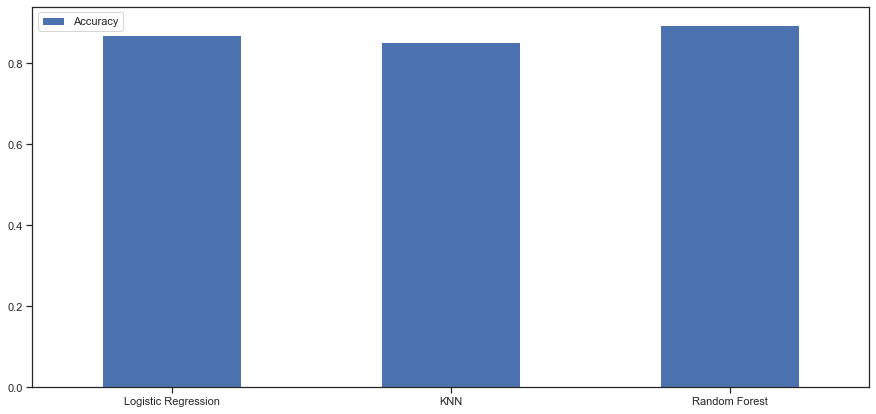

In [44]:
model_compare= pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation=0)

In [45]:
# Using Random forest Classifier Algorithm
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


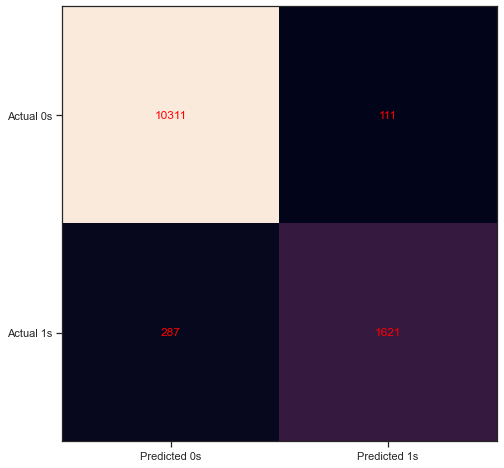

In [46]:
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [47]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2966  111]
 [ 287  335]]


In [48]:
# Accuracy Report Of Random Forest 
cr1 = classification_report(y_test, y_pred)
print(cr1)

              precision    recall  f1-score   support

       False       0.91      0.96      0.94      3077
        True       0.75      0.54      0.63       622

    accuracy                           0.89      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.88      0.89      0.89      3699



### Plotting the ROC curve for Random Forest

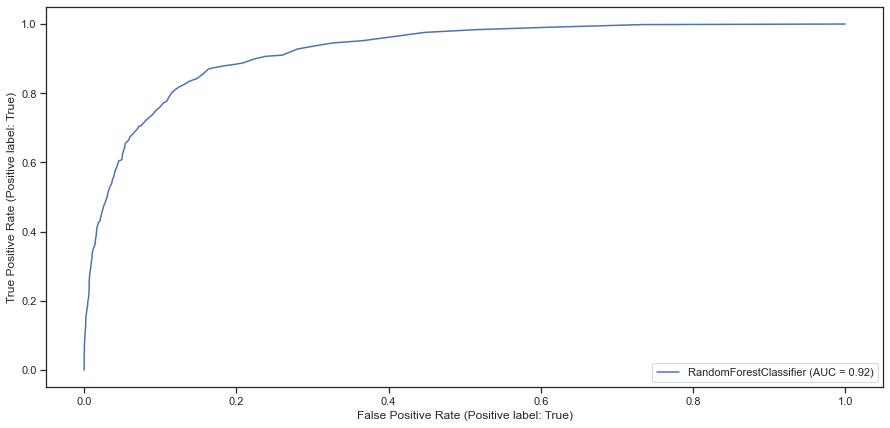

In [49]:

rf_disp = plot_roc_curve(model, x_test, y_test)
plt.show()



### Confusion Matrix Models Evaluation

In [50]:
Lr = LogisticRegression(solver='liblinear', random_state=0)
Lr.fit(x_train, y_train)
y_pred1 = Lr.predict(x_test)

In [51]:
cm = confusion_matrix(y_test, y_pred1)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[3003   74]
 [ 388  234]]


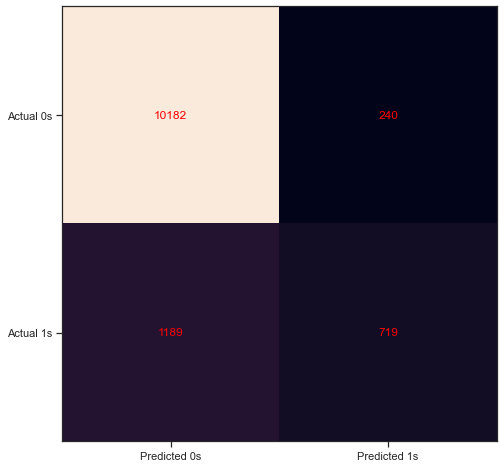

In [52]:
cm = confusion_matrix(y, Lr.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [53]:
# Accuracy Report Of Logistic Regression
cr1 = classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3077
        True       0.76      0.38      0.50       622

    accuracy                           0.88      3699
   macro avg       0.82      0.68      0.72      3699
weighted avg       0.86      0.88      0.86      3699



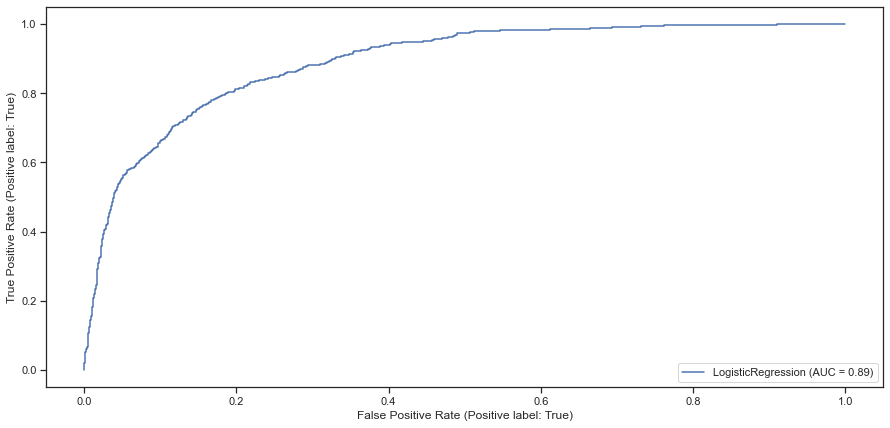

In [54]:
### Plotting ROC curve for Logistic Regresssion
lr_disp = plot_roc_curve(Lr, x_test, y_test)
plt.show()

### Plotting ROC curve for both Random Forest and Logistic Regression

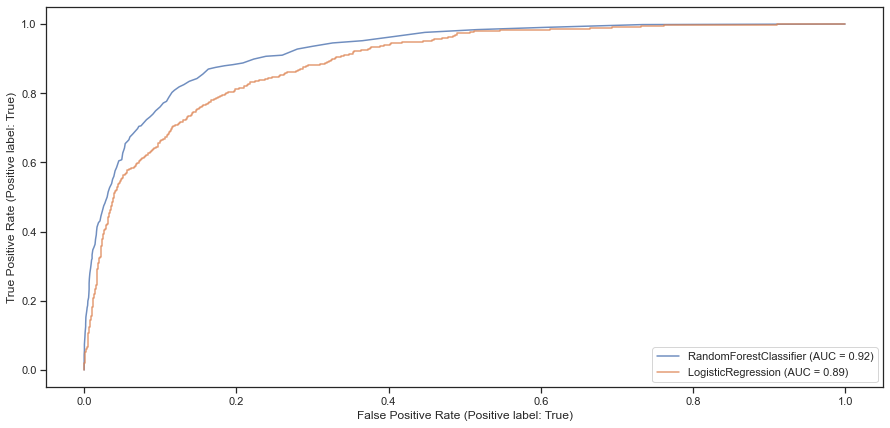

In [55]:
ax = plt.gca()
rf_disp = plot_roc_curve(model, x_test, y_test, ax=ax, alpha=0.8)
lr_disp.plot(ax=ax, alpha=0.8)
plt.show()

### Hyperparameter tuning with RandomizedSearchCv with Cross validation
We are going to tune :
Random Forest Classifier because it has the highest accuracy of 89.5 %
.... using RandomizedSearchCV

In [56]:
# Create hyperparametergrid for Random Forest Classifier
rf_grid={"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [5524]}
        

In [57]:
#Setup random seed 
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

#Fit random hyperparameter search modelfor RandomForestClassifier

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [5524],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [58]:
rs_rf.best_params_

{'n_estimators': 90,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_samples': 5524,
 'max_features': 'sqrt',
 'max_depth': 10}

In [59]:
rs_rf.best_estimator_

RandomForestClassifier(max_depth=10, max_samples=5524, min_samples_leaf=7,
                       min_samples_split=12, n_estimators=90)

In [60]:
rs_rf.score(x_test,y_test)

0.8918626655852934

### Cross validation Random Forest Model
> we are going to use cv=5 which means 5 datasets from x-train and y_train 

In [61]:
accuracies=cross_val_score(estimator=rs_rf, X=x_train,y=y_train,cv=5)

print("Accuracy is  {:.2f} %". format(accuracies.mean()*100))

print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy is  90.41 %
Standard Deviation is 0.21 %


### Saving the predictions of Random Forest model into a dataframe
> We can later be written in a .csv file, so that we can know from which customer we will get the revenue.

In [62]:
y_pred2=rs_rf.predict(x_test)
y_pred2

df0 = pd.DataFrame(y_pred2, columns=["Revenue"])
df0

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
3694,False
3695,True
3696,False
3697,False


### Feature Importance
> * This is another way of asking "Which feature contributed most to the outcomes of the model and how did they contibute?"
> * Finding feature importance is different for each machine learning model.One way to find feature importance is to search for"(MODEL NAME) feature importance.
> * Lets find the feature importance for our RandomForest Model...

In [63]:
model.feature_importances_


array([4.32428612e-02, 6.08150846e-02, 1.81767982e-02, 2.61707177e-02,
       7.20687234e-02, 8.98356433e-02, 5.70033512e-02, 8.25411563e-02,
       3.57691240e-01, 3.50630515e-03, 1.87747740e-02, 2.04631951e-02,
       3.26016782e-02, 3.08849373e-02, 1.06452332e-02, 3.64345342e-03,
       6.32939236e-03, 2.33037140e-04, 4.41000533e-03, 2.45721816e-03,
       4.95312224e-03, 6.42624047e-03, 2.18003034e-02, 3.81042506e-03,
       3.72187023e-03, 9.05640197e-03, 4.74932278e-04, 8.26189859e-03])

In [64]:
# Check coef_ 
modelrf=list(model.feature_importances_)
modelrf

[0.043242861211507326,
 0.06081508460620747,
 0.01817679821371228,
 0.026170717718083936,
 0.07206872336926373,
 0.08983564325694877,
 0.0570033512400588,
 0.08254115630372641,
 0.3576912404600195,
 0.0035063051480635197,
 0.018774773968406648,
 0.020463195142563912,
 0.03260167820346929,
 0.030884937344001943,
 0.010645233224678296,
 0.003643453419545471,
 0.0063293923640588765,
 0.0002330371404963018,
 0.004410005326673962,
 0.0024572181599058947,
 0.004953122239359429,
 0.006426240465751194,
 0.02180030335012755,
 0.0038104250561862584,
 0.003721870232251792,
 0.009056401966932302,
 0.0004749322779575634,
 0.008261898590041524]

In [65]:
# Match coefficiences with ,list of columns

feature_dict=dict(zip(df2.columns,modelrf))
feature_dict

{'Administrative': 0.043242861211507326,
 'Administrative_Duration': 0.06081508460620747,
 'Informational': 0.01817679821371228,
 'Informational_Duration': 0.026170717718083936,
 'ProductRelated': 0.07206872336926373,
 'ProductRelated_Duration': 0.08983564325694877,
 'BounceRates': 0.0570033512400588,
 'ExitRates': 0.08254115630372641,
 'PageValues': 0.3576912404600195,
 'SpecialDay': 0.0035063051480635197,
 'Month': 0.018774773968406648,
 'OperatingSystems': 0.020463195142563912,
 'Browser': 0.03260167820346929,
 'Region': 0.030884937344001943,
 'TrafficType': 0.010645233224678296,
 'VisitorType': 0.003643453419545471,
 'Weekend': 0.0063293923640588765,
 'Revenue': 0.0002330371404963018}

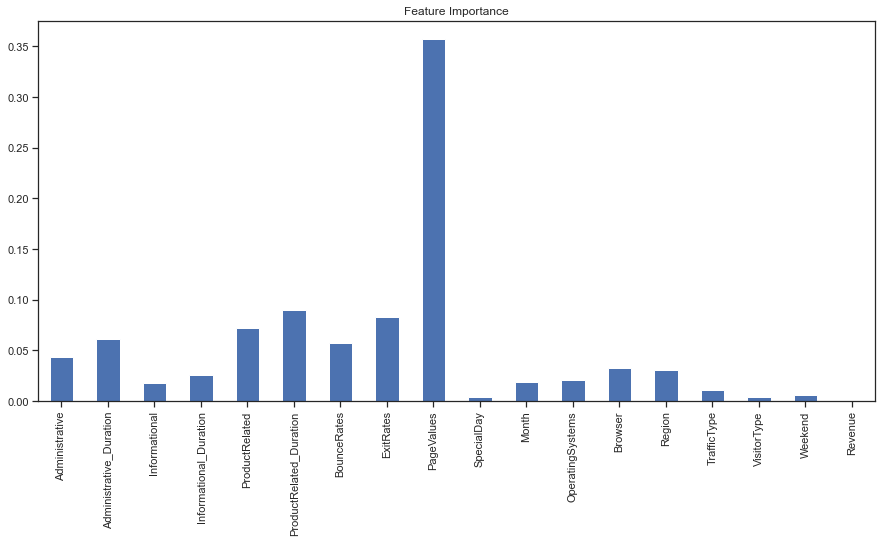

In [66]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);


## Conclusion
> We took a case study, performed Data Visualizations, made clusters based on customer behaviors, built three predictive models: Random Forest classifier , Logistic classifier and K-nearest neighbor , immediately droped KNN after it had the lowest accuracy score.
> Compared performance of the two algorithms left, Logistic Regression and Random forest models using Confusion Matrix and ROC curve and also wrote the predictions from both the models into respective data-frames, so that the business decision makers can know the exact customers who will generate the revenue and who will not, by writing those prediction outputs into csv files.
I have failed to hit my evaluation metric of 95% only managed 90.4% with Randon Forest model which is no very bad.

I should collect more data.

I would try out another model eg catBoost or XGBoost.

Try to improve LogisticRegression .

If the model is good enough